In [ ]:
import pandas as pd
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

# Read in price data
# df=yf.download('GOOG AAPL FB BABA AMZN UAA XOM RRC BBY MA PFE JPM SBUX TSLA BAC GM',start='2010-01-01',end='2022-04-11')['Adj Close']
df=yf.download('AAPL NKE INTC V MSFT HD DIS BA PFE JNJ',start='2013-01-01',end='2019-01-01')['Adj Close']
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)
print(mu)
print(S)
# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
print(ef.max_sharpe())
# raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.csv")  # saves to file
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

[*********************100%***********************]  10 of 10 completed
AAPL    0.145628
BA      0.301817
DIS     0.151876
HD      0.206434
INTC    0.176122
JNJ     0.136564
MSFT    0.274452
NKE     0.206408
PFE     0.130151
V       0.235504
dtype: float64
          AAPL        BA       DIS        HD      INTC       JNJ      MSFT  \
AAPL  0.061121  0.018986  0.014708  0.014602  0.022493  0.009631  0.024740   
BA    0.018986  0.052700  0.017603  0.017165  0.020667  0.013681  0.020012   
DIS   0.014708  0.017603  0.035038  0.014971  0.017559  0.010907  0.016811   
HD    0.014602  0.017165  0.014971  0.033600  0.016734  0.011458  0.017675   
INTC  0.022493  0.020667  0.017559  0.016734  0.057516  0.012733  0.029922   
JNJ   0.009631  0.013681  0.010907  0.011458  0.012733  0.023811  0.013142   
MSFT  0.024740  0.020012  0.016811  0.017675  0.029922  0.013142  0.054901   
NKE   0.015360  0.018825  0.017434  0.019137  0.016760  0.011601  0.018636   
PFE   0.010615  0.012789  0.012685  0.0127

(0.26088252312430926, 0.16438326387220412, 1.465371336777798)

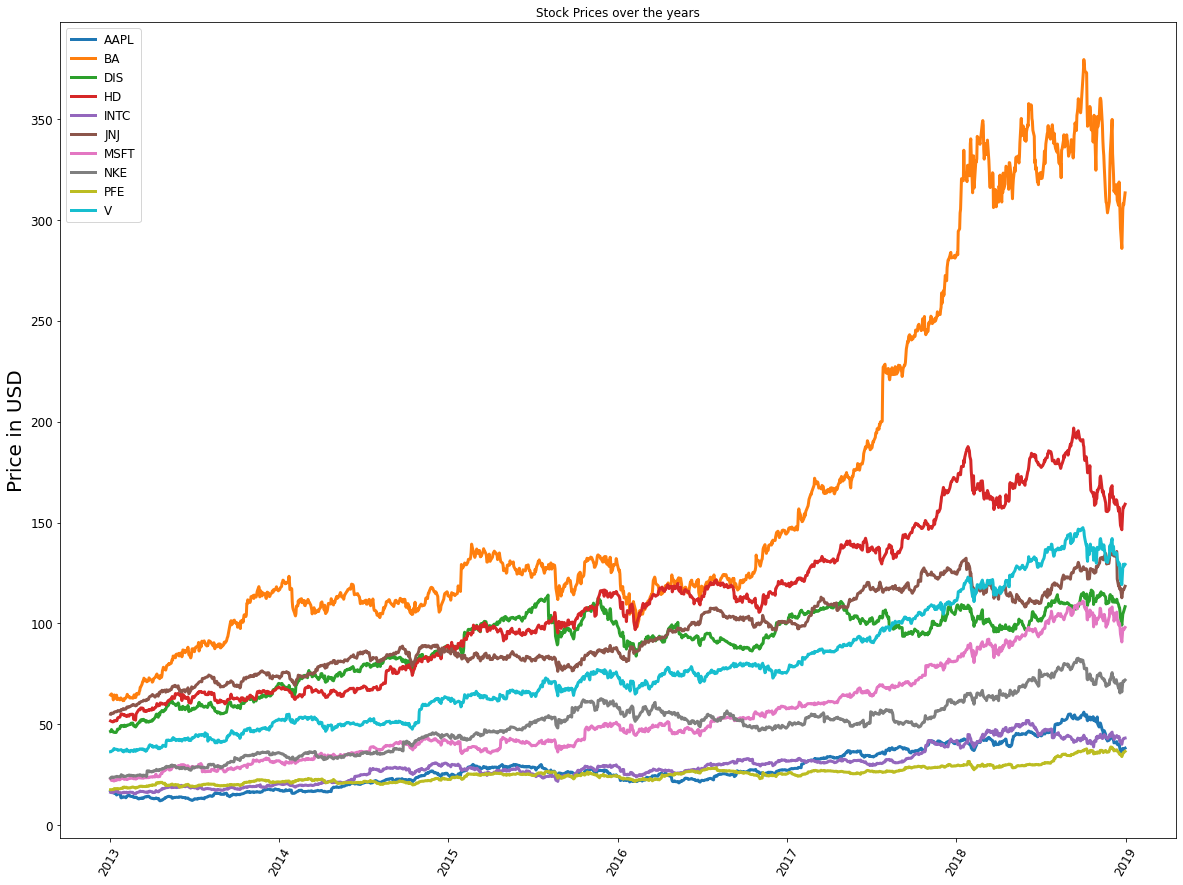

In [ ]:
#graph of 10 Stocks
f=plt.figure(figsize=(20,15))
plt.plot(df,linewidth=3)
plt.title('Stock Prices over the years',fontsize=12)
plt.xticks(fontsize=12,rotation=60)
plt.yticks(fontsize=12)
plt.ylabel('Price in USD',fontsize=20)
plt.legend(df.columns ,loc=2, prop={'size': 12})


----------------------------Daily return--------------------
                AAPL        BA       DIS        HD      INTC       JNJ  \
Date                                                                     
2013-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2013-01-03 -0.012703  0.005176  0.002150 -0.002840 -0.002810 -0.001413   
2013-01-04 -0.028250  0.002836  0.018956 -0.001898 -0.007533  0.011385   
2013-01-07 -0.005899 -0.020284 -0.023654 -0.005396  0.004244 -0.002098   
2013-01-08  0.002687 -0.026622 -0.004129  0.006029 -0.007558  0.000140   

                MSFT       NKE       PFE         V  
Date                                                
2013-01-02       NaN       NaN       NaN       NaN  
2013-01-03 -0.013487  0.010172 -0.002318  0.000772  
2013-01-04 -0.018893  0.009691  0.004246  0.008134  
2013-01-07 -0.001872  0.001512  0.000770  0.007119  
2013-01-08 -0.005259 -0.010630  0.001539  0.009267  


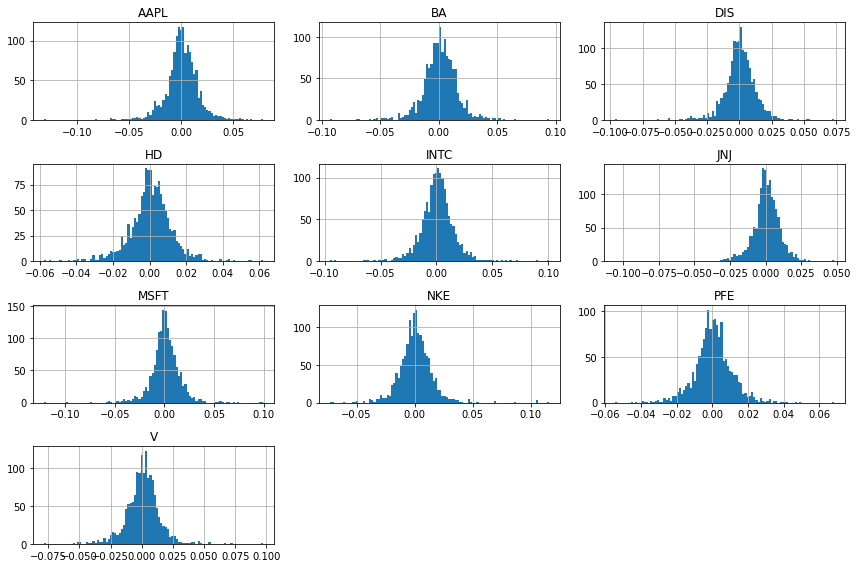

In [ ]:
# reating daily return.
print("----------------------------Daily return--------------------")
log_ret =np.log(df/df.shift(1))
print(log_ret.head())
log_ret.hist(bins=100,figsize=(12,8))
g = plt.tight_layout()


In [ ]:
print('\nDaily Return graph generated.............\n')
print('--------------------Description of Log Return-------------')
print(log_ret.describe().T)


Daily Return graph generated.............

--------------------Description of Log Return-------------
       count      mean       std       min       25%       50%       75%  \
AAPL  1509.0  0.000539  0.015623 -0.131885 -0.006546  0.000512  0.008836   
BA    1509.0  0.001047  0.014467 -0.093531 -0.006597  0.001334  0.009377   
DIS   1509.0  0.000561  0.011818 -0.096190 -0.005318  0.000815  0.007036   
HD    1509.0  0.000745  0.011543 -0.057616 -0.004913  0.000765  0.006966   
INTC  1509.0  0.000644  0.015095 -0.095432 -0.007137  0.000914  0.008291   
JNJ   1509.0  0.000508  0.009765 -0.105782 -0.003978  0.000596  0.005905   
MSFT  1509.0  0.000962  0.014754 -0.121033 -0.005949  0.000684  0.007985   
NKE   1509.0  0.000745  0.014458 -0.073114 -0.006581  0.000496  0.007773   
PFE   1509.0  0.000486  0.010828 -0.054446 -0.005057  0.000302  0.005771   
V     1509.0  0.000839  0.013236 -0.078369 -0.005680  0.001259  0.007843   

           max  
AAPL  0.078794  
BA    0.094214  
DIS   0.0

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

weights=pd.read_csv('/content/weights.csv',index_col=0, header=None, squeeze=True).to_dict()
print(weights)
latest_prices = get_latest_prices(df)
print(latest_prices)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=1000000)
allocation, leftover = da.greedy_portfolio(verbose=True)
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

{'AAPL': 0.0, 'BA': 0.37175, 'DIS': 0.0, 'HD': 0.21041, 'INTC': 0.0, 'JNJ': 0.01064, 'MSFT': 0.24593, 'NKE': 0.05783, 'PFE': 0.0, 'V': 0.10346}
AAPL     38.233894
BA      313.372253
DIS     108.326126
HD      159.104965
INTC     43.218399
JNJ     118.426163
MSFT     98.014908
NKE      71.963921
PFE      36.640781
V       129.290939
Name: 2018-12-31 00:00:00, dtype: float64
Funds remaining: 4.95
BA: allocated 0.372, desired 0.372
MSFT: allocated 0.246, desired 0.246
HD: allocated 0.210, desired 0.210
V: allocated 0.104, desired 0.103
NKE: allocated 0.058, desired 0.058
JNJ: allocated 0.011, desired 0.011
AAPL: allocated 0.000, desired 0.000
DIS: allocated 0.000, desired 0.000
INTC: allocated 0.000, desired 0.000
PFE: allocated 0.000, desired 0.000
Allocation has RMSE: 0.000
Discrete allocation: {'BA': 1186, 'MSFT': 2509, 'HD': 1322, 'V': 801, 'NKE': 804, 'JNJ': 90}
Funds remaining: $4.95


Text(0.5, 1.0, 'Portfolio Allocation')

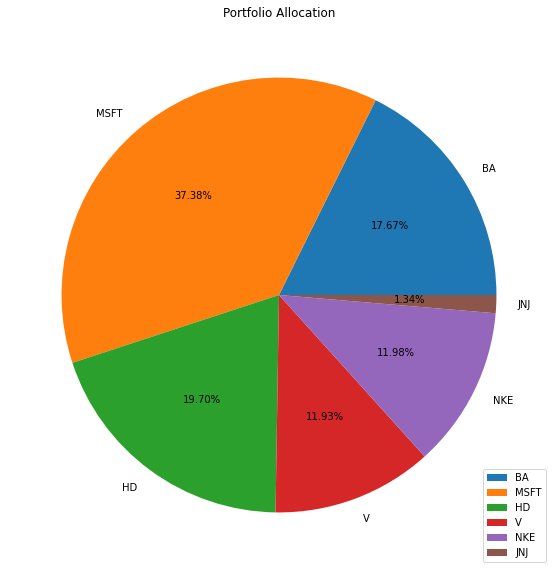

In [ ]:
# Generate pie charf for east understanding of portfolio
# df = DataFrame (max_sharpe_allocation)
p = plt.figure(figsize=(10,10))
plt.pie(allocation.values(),labels=allocation.keys(),autopct='%1.2f%%')
plt.legend()
plt.title("Portfolio Allocation")

In [ ]:
print("\n-------------Yearly covariance-----------")
# Compute pairwise covariance of columns
print(log_ret.cov()*252)
# predicting charp ratio using random values of weight and scaling it to 1
np.random.seed(1276)
# Finding optimum in 25000 repititions
num_ports = 25000
all_weight = np.zeros((num_ports,len(df.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharp_arr = np.zeros(num_ports)
for i in range(num_ports):
 weight = np.array(np.random.random(10))
 weight = weight/np.sum(weight)
 #Save the weight
 all_weight[i,:]=weight
 # Expected Return
 ret_arr[i] = np.sum( (log_ret.mean()* weight)*252)
 #Expected Volitility
 vol_arr[i] = np.sqrt(np.dot(weight,np.dot(log_ret.cov()*252,weight)))
 #Sharp Ratio
 sharp_arr[i]= ret_arr[i]/vol_arr[i]



-------------Yearly covariance-----------
          AAPL        BA       DIS        HD      INTC       JNJ      MSFT  \
AAPL  0.061504  0.019086  0.014739  0.014614  0.022565  0.009656  0.024783   
BA    0.019086  0.052741  0.017683  0.017242  0.020751  0.013739  0.020122   
DIS   0.014739  0.017683  0.035195  0.015005  0.017640  0.010951  0.016887   
HD    0.014614  0.017242  0.015005  0.033576  0.016754  0.011505  0.017710   
INTC  0.022565  0.020751  0.017640  0.016754  0.057421  0.012767  0.029909   
JNJ   0.009656  0.013739  0.010951  0.011505  0.012767  0.024030  0.013167   
MSFT  0.024783  0.020122  0.016887  0.017710  0.029909  0.013167  0.054852   
NKE   0.015353  0.018913  0.017474  0.019154  0.016797  0.011651  0.018721   
PFE   0.010587  0.012853  0.012725  0.012755  0.014589  0.014506  0.013888   
V     0.020248  0.021913  0.017500  0.018253  0.021197  0.013772  0.025812   

           NKE       PFE         V  
AAPL  0.015353  0.010587  0.020248  
BA    0.018913  0.012853


====================Random generated===============================

Maximum Sharp Ratio(using random number generation) : 1.3903408861178645
Maximum Sharpe Ratio Portfolio Allocation

Portfolio allocation graph generate...
      allocation
AAPL        2.49
BA         26.06
DIS         0.28
HD         23.31
INTC        2.34
JNJ        15.30
MSFT       10.79
NKE         7.70
PFE         2.46
V           9.26


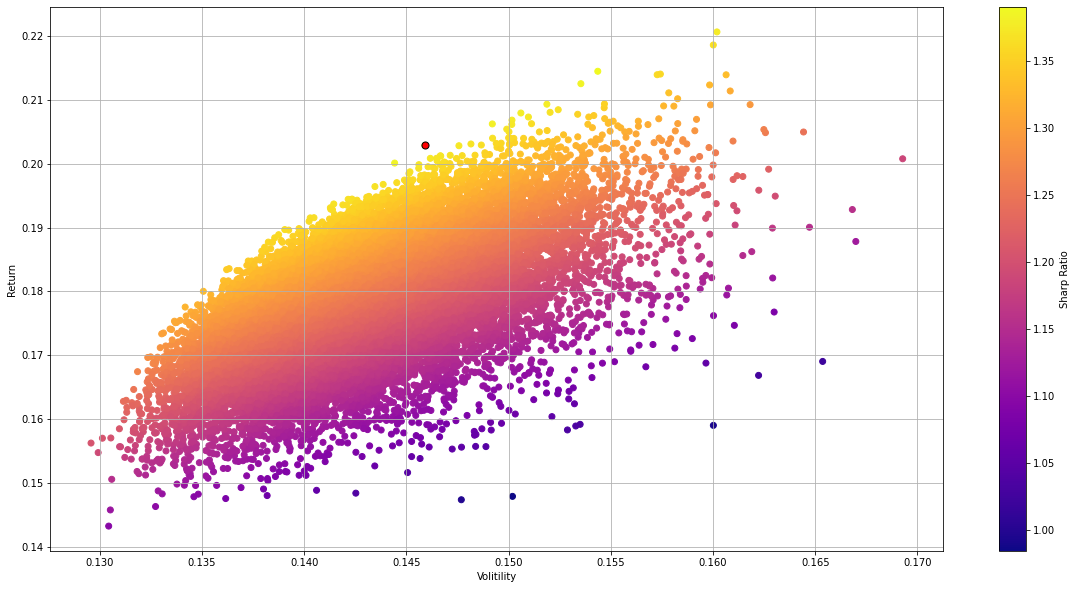

In [ ]:
print("\n====================Random generated===============================\n")
print("Maximum Sharp Ratio(using random number generation) :",sharp_arr.max())
print("Maximum Sharpe Ratio Portfolio Allocation\n")
print('Portfolio allocation graph generate...')
max_sharpe_allocation = pd.DataFrame(all_weight[sharp_arr.argmax()],index=df.columns,columns=['allocation'])
max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
print(max_sharpe_allocation)
max_sr_ret = ret_arr[sharp_arr.argmax()]
max_sr_vol = vol_arr[sharp_arr.argmax()]
l=plt.figure(figsize=(20,10))
plt.scatter(vol_arr,ret_arr,c=sharp_arr,cmap='plasma')
plt.colorbar(label='Sharp Ratio')
plt.xlabel('Volitility')
plt.ylabel('Return')
plt.grid(True)
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

In [ ]:
#Mathematical Optimization
def get_ret_vol_sr(weight):
  weight = np.array(weight)
  ret = np.sum(log_ret.mean()*weight) *252
  vol = np.sqrt(np.dot(weight.T,np.dot(log_ret.cov()*252,weight)))
  sr=ret/vol
  return np.array([ret,vol,sr])
def neg_sharp(weight):
  return get_ret_vol_sr(weight)[2]*-1
def check_sum(weight):
  # if sum is one it returns zero
  return np.sum(weight)-1

Optimization using random sampling graph generate...




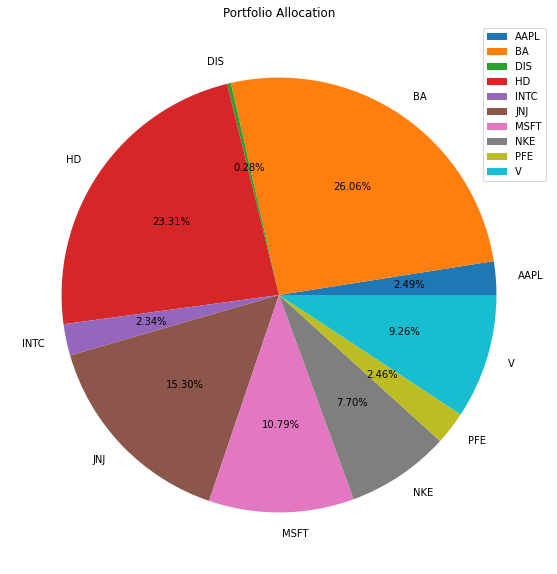

In [ ]:
print('Optimization using random sampling graph generate...')
print("\n====================================================================\n")
# Generate pie charf for east understanding of portfolio
df1=pd.DataFrame(max_sharpe_allocation)
p = plt.figure(figsize=(10,10))
plt.pie(df1['allocation'],labels=df1.index,autopct='%1.2f%%')
plt.legend()
plt.title("Portfolio Allocation")
cons = ({'type':'eq','fun':check_sum})
# bound = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1))
bound = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1))
# init_guess = [0.10,0.10,0.10,0.10,.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10]
init_guess = [0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10]
opt_result = minimize(neg_sharp,init_guess,method='SLSQP',bounds=bound,constraints=cons)


-------Mathematical Optimized Result set---------

     fun: -1.4123868807664288
     jac: array([ 1.94556549e-01, -3.81201506e-04,  4.24072146e-02,  4.60445881e-05,
        1.75126180e-01,  1.75878406e-04,  3.01077962e-04,  1.90168619e-04,
        2.00857222e-03,  1.32769346e-04])
 message: 'Optimization terminated successfully.'
    nfev: 84
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.00000000e+00, 3.05402246e-01, 0.00000000e+00, 2.19352384e-01,
       3.57292804e-17, 1.01088029e-01, 2.08079440e-01, 6.69524213e-02,
       1.31929289e-18, 9.91254806e-02])

=================Mathematically Maximized===========================

Mathematically Maximized Sharp ratio :  1.4123868807664288
Maximum Sharpe Ratio Portfolio Allocation

      allocation
AAPL        0.00
BA         30.54
DIS         0.00
HD         21.94
INTC        0.00
JNJ        10.11
MSFT       20.81
NKE         6.70
PFE         0.00
V           9.91
Portfolio allocation graph generate...

Efficient 

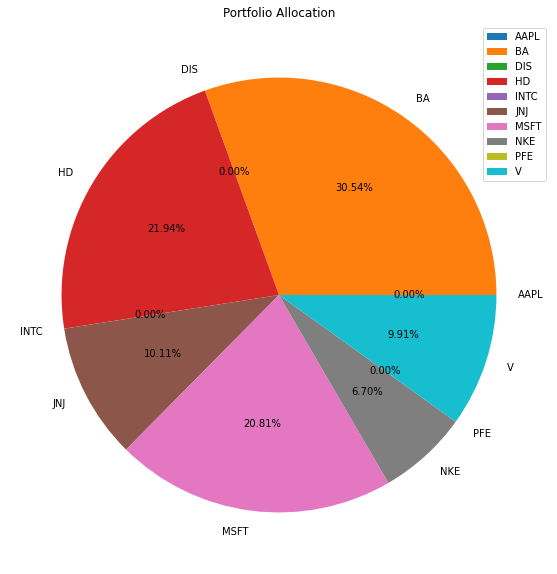

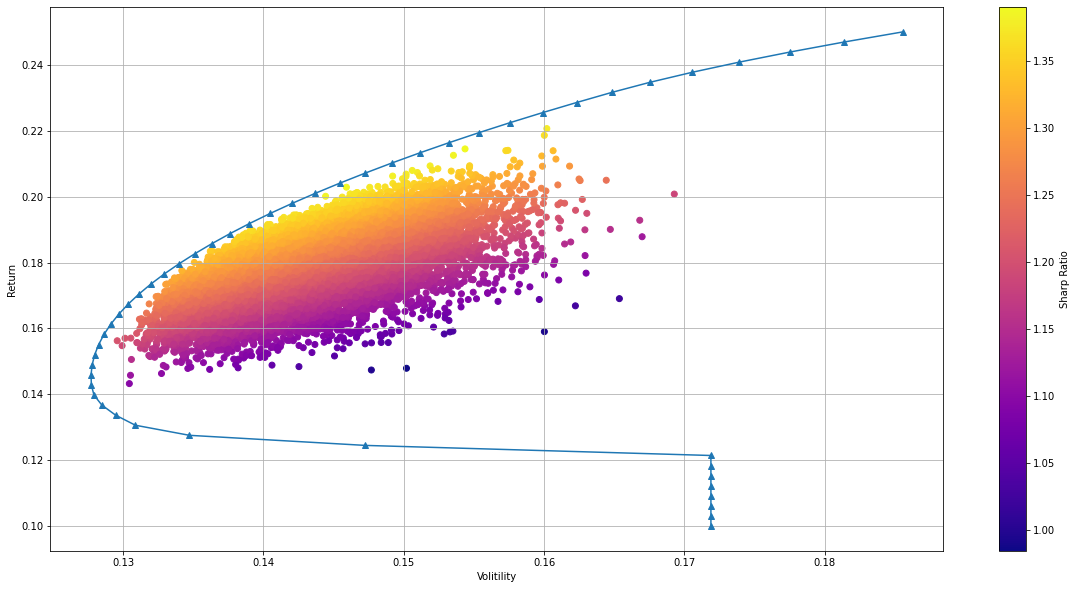

In [ ]:
print("\n-------Mathematical Optimized Result set---------\n")
print(opt_result)
print("\n=================Mathematically Maximized===========================\n")
print("Mathematically Maximized Sharp ratio : ",list(get_ret_vol_sr(opt_result.x))[2])
print("Maximum Sharpe Ratio Portfolio Allocation\n")
max_sharpe_allocation_new = pd.DataFrame(list(opt_result.x),index=df.columns,columns=['allocation'])
max_sharpe_allocation_new.allocation = [round(i*100,2)for i in max_sharpe_allocation_new.allocation]
print(max_sharpe_allocation_new)
print('Portfolio allocation graph generate...')
df = pd.DataFrame (max_sharpe_allocation_new)
o = plt.figure(figsize=(10,10))
plt.pie(df['allocation'],labels=df.index,autopct='%1.2f%%')
plt.legend()
plt.title("Portfolio Allocation")
#Efficient forointier
frointier_y = np.linspace(.10,.25,50)
def minimize_vol(weight):
 return get_ret_vol_sr(weight)[1]
frointier_vol = []
for possible_return in frointier_y:
 cons = ({'type':'eq','fun':check_sum},
 {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0]-possible_return})
 result = minimize(minimize_vol,init_guess,method='SLSQP',bounds=bound,constraints=cons)
 frointier_vol.append(result['fun'])
p=plt.figure(figsize=(20,10))
plt.scatter(vol_arr,ret_arr,c=sharp_arr,cmap='plasma')
plt.colorbar(label='Sharp Ratio')
plt.xlabel('Volitility')
plt.ylabel('Return')
plt.grid(True)
plt.plot(frointier_vol,frointier_y,marker='^')
print("\nEfficient forointier graph generated... ")
print("\n====================================================================\n")
plt.show()

In [ ]:
# ! pip install pyportfolioopt
# ! pip install yfinance